In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2.1: load the validated datasets
print("Loading the validated datasets...")
train_final = pd.read_csv('engineered_data/fraudTrain_engineered.csv')
test_final = pd.read_csv('engineered_data/fraudTest_engineered.csv')

Loading the validated datasets...


In [ ]:
# Step 2.2: prepare features and target
# encode gender using one-hot encoding
train_final = pd.get_dummies(train_final, columns=['gender'], drop_first=True)
test_final = pd.get_dummies(test_final, columns=['gender'], drop_first=True)

In [ ]:
# define features 
features = [col for col in train_final.columns if col not in ['is_fraud']]
X_train = train_final[features]
y_train = train_final['is_fraud']
X_test = test_final[features]
y_test = test_final['is_fraud']

In [ ]:
# Step 2.3: train a baseline model (Random Forest)
print("Training a baseline Random Forest model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

Training a baseline Random Forest model...


RandomForestClassifier(random_state=42)

In [ ]:
# Step 2.4: make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Step 2.5: evaluate the model
print("\nModel Evaluation on Test Set:")
print(classification_report(y_test, y_pred))


Model Evaluation on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.71      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.86      0.91    555719
weighted avg       1.00      1.00      1.00    555719



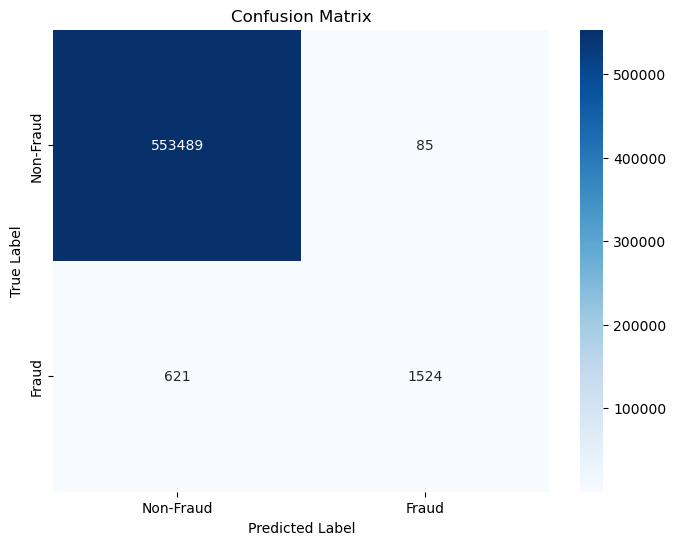

In [ ]:
# Step 2.6: visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()